# Data Exploration

In this notebook we would go through our datasets and explore them. 

## Install dependencies

In [49]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"


## Importing Modules

In [50]:
import subprocess
import zipfile
import os
import shutil
import pandas as pd
import sqlite3
import requests
from io import StringIO
import matplotlib.pyplot as plt

## Load data

### 1.1 Loading first dataset

In [51]:

# Define the command to download the dataset
command = 'kaggle datasets download -d mathurinache/world-happiness-report'

# Execute the command using subprocess
subprocess.run(command, shell=True)

# Path to the downloaded ZIP file
zip_file_path = 'world-happiness-report.zip'

# Destination folder for extracted files
extract_folder = 'world-happiness-report'

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Access and read the CSV file
csv_file_path = os.path.join(extract_folder, '2020.csv')  # Path to the CSV file


# Read the CSV file into a pandas DataFrame
happiness_df = pd.read_csv(csv_file_path)

# Second step : Perform operations, fix errors, and manipulate the DataFrame as needed

happiness_df.set_index('Country name', inplace= True)


### 1.1 Loading second dataset

In [52]:

# Novel Coronavirus (COVID-19) Cases Data

# URL of the CSV file
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"

# First step : Fetch the CSV data from the URL
response = requests.get(url)
data = response.content.decode('utf-8')

# Read the CSV data using pandas
df = pd.read_csv(StringIO(data))

# Second Step : Perform operations, fix errors, and manipulate the DataFrame as needed

df.drop(["Province/State","Lat", "Long"], axis = 1, inplace = True) # There are 3 unneccery column in file which we do not need

# Grouping by 'Country/Region' and creating a new DataFrame
grouped_df = df.groupby('Country/Region').sum().reset_index()


# Adding two new columns for further analyse
countries = list(grouped_df.index)

# first one is sum of infections in each country
# sum values across all columns except the country column
columns_to_sum = grouped_df.columns[1:]  # Exclude the first column (assuming it's the 'Country' column)

# Creating a new column to store the sum for each country
grouped_df['sum_for_each_country'] = grouped_df[columns_to_sum].sum(axis=1)

# final dataset with countries name and sum for each country only
selected_columns = ['Country/Region', 'sum_for_each_country']
covid_df = grouped_df[selected_columns].copy()

### 1.3 Merging two datasets to have the whole info

In [53]:
# now I have joined two datasets based on mutual column to have my final dataset and go through it
# Perform an inner join on the different columns

merged_df = pd.merge(covid_df, happiness_df, left_on='Country/Region', right_on='Country name', how='inner')

df=merged_df

# Delete the ZIP file and extracted folder
os.remove(zip_file_path)
shutil.rmtree(extract_folder)

### Look at the first rows

In [54]:
df.head(10)

,Country/Region,sum_for_each_country,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Afghanistan,129988469,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,...,-0.096429,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236
1,Albania,185562654,Central and Eastern Europe,4.8827,0.056116,4.992687,4.772713,9.417931,0.671070,68.708138,...,-0.042309,0.896304,1.972317,0.906653,0.830484,0.846330,0.461946,0.171028,0.025361,1.640897
2,Algeria,182741650,Middle East and North Africa,5.0051,0.044236,5.091802,4.918397,9.537965,0.803385,65.905174,...,-0.121105,0.735485,1.972317,0.943856,1.143004,0.745419,0.083944,0.118915,0.129191,1.840812
3,Argentina,5625482921,Latin America and Caribbean,5.9747,0.053442,6.079446,5.869954,9.810955,0.900568,68.803802,...,-0.194914,0.842010,1.972317,1.028466,1.372544,0.849774,0.520840,0.070100,0.060415,2.072541
4,Armenia,285491323,Commonwealth of Independent States,4.6768,0.058595,4.791646,4.561953,9.100476,0.757479,66.750656,...,-0.138780,0.773545,1.972317,0.808262,1.034577,0.775857,0.378076,0.107226,0.104618,1.468162
5,Australia,3508864881,North America and ANZ,7.2228,0.041841,7.304808,7.140791,10.720596,0.944855,73.604538,...,0.190460,0.415169,1.972317,1.310396,1.477146,1.022608,0.621877,0.324974,0.335996,2.129804
6,Austria,2210457634,Western Europe,7.2942,0.033365,7.359596,7.228804,10.742824,0.928046,73.002502,...,0.085429,0.499955,1.972317,1.317286,1.437445,1.000934,0.603369,0.255510,0.281256,2.398446
7,Azerbaijan,493546661,Commonwealth of Independent States,5.1648,0.034197,5.231827,5.097774,9.687727,0.819308,65.508400,...,-0.240255,0.552538,1.972317,0.990273,1.180613,0.731134,0.467735,0.040113,0.247307,1.507633
8,Bahrain,357306683,Middle East and North Africa,6.2273,0.081882,6.387789,6.066811,10.676380,0.876342,68.500000,...,0.133729,0.739347,1.972317,1.296692,1.315324,0.838836,0.610400,0.287454,0.126697,1.751917
9,Bangladesh,1309367681,South Asia,4.8328,0.040124,4.911443,4.754157,8.287064,0.687293,64.503067,...,-0.033665,0.661844,1.972317,0.556156,0.868801,0.694941,0.604131,0.176745,0.176736,1.755262


### Data exploration
We print some basic information about the data and continue our data exploration here.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country/Region                              141 non-null    object 
 1   sum_for_each_country                        141 non-null    int64  
 2   Regional indicator                          141 non-null    object 
 3   Ladder score                                141 non-null    float64
 4   Standard error of ladder score              141 non-null    float64
 5   upperwhisker                                141 non-null    float64
 6   lowerwhisker                                141 non-null    float64
 7   Logged GDP per capita                       141 non-null    float64
 8   Social support                              141 non-null    float64
 9   Healthy life expectancy                     141 non-null    float64
 10  Freedom to mak

# Visualization

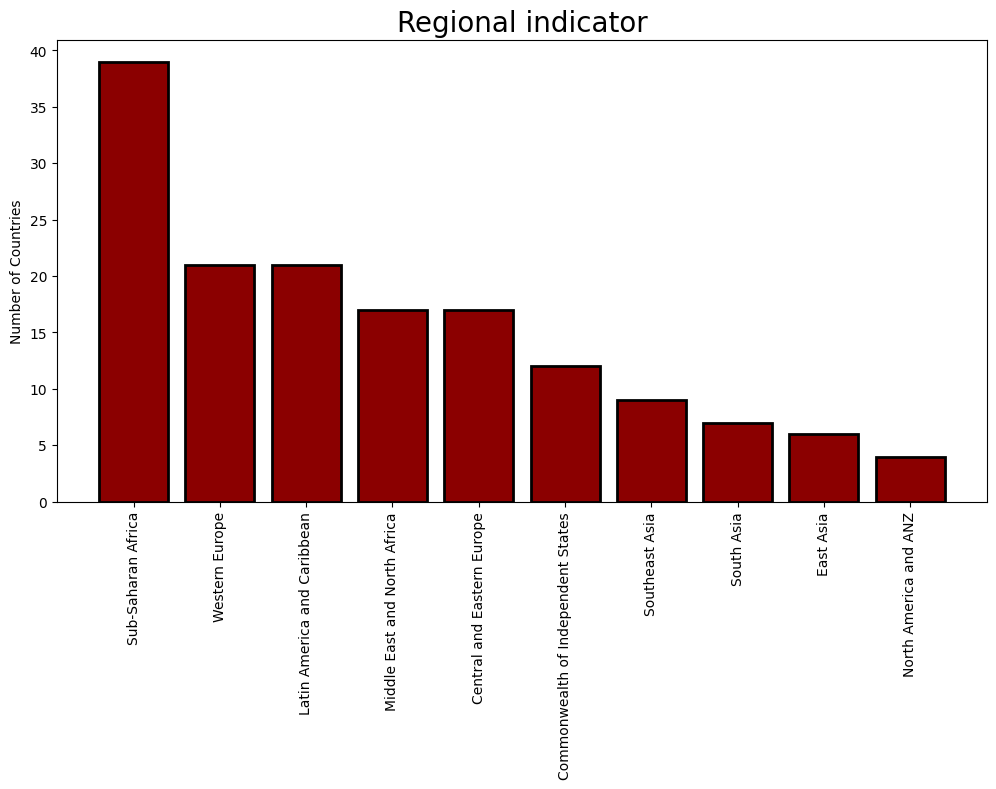

In [56]:
# Regional indicator

# we find our regions
regions = happiness_df["Regional indicator"]
# How many countries does the region have ?
"""
value_counts()
regions_counts.index = names of regions
regions_counts.values = how many countries
"""
regions_counts = regions.value_counts()

# visualize
# Bar plot explained in detail in another of my kernel
plt.figure(figsize=(12,6))
plt.bar(regions_counts.index, regions_counts.values,color = "darkred", edgecolor = "black", linewidth = 2)
plt.xticks(rotation = "vertical",size = 10)
plt.ylabel("Number of Countries")
plt.title("Regional indicator",size = 20)
plt.show()

## Pie Chart for 10 highest death cases around world

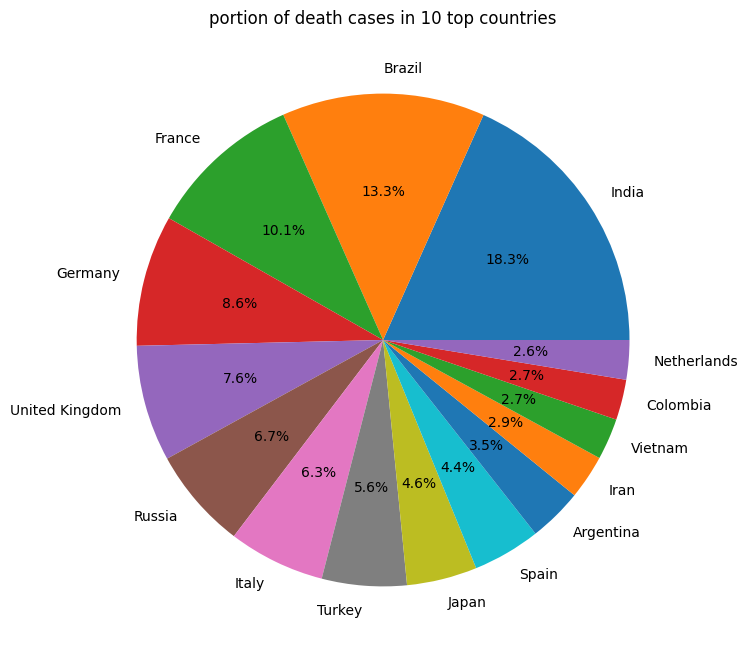

In [60]:
# sorting dataset based on death cases' count
sorted_df = df.sort_values(by='sum_for_each_country', ascending=False)

# selecting top 15 of them
top_15=sorted_df.head(15)

# doing visualization for this portion
plt.figure(figsize=(10, 8))
plt.pie(top_15['sum_for_each_country'], labels=top_15['Country/Region'], autopct='%1.1f%%')
plt.title('portion of death cases in 15 top countries')
plt.show()